# Module 6 Exercises (Euler's Method for first-order ODEs)


In [3]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 

### Exercise 1
**Note**: If you have not taken MATH 215, the description below about the logistic model may be a little hard to follow. In that case, you can simply skip to Part (a) and treat this as an exercise in solving a first-order ODE (Eq. (3)).

In the notes on Euler's method, we have an example of exponential growth, in which the rate of change of a quantity is proportional to the quantity itself. This model works well for the population growth of a bacterial colony (and, sadly, for the initial spread of a contagious disease such as COVID-19; we have also seen it in the Monte Carlo simulation in Exercise set 5-5). There are, however, limitations to exponential growth, because such growth cannot be sustained indefinitely in reality, due to limited resources needed for the growth. A more realistic model is the **logistic model**, in which the rate of change of the population decreases as the population size $P$ increases, as given by the following differential equation:

$$\frac{{dP}}{{dt}} = r\left( {1 - \frac{P}{K}} \right)P. \ \ \ \ \ \ \ (1)$$

To understand the meaning of this equation, we will examine it more closely. We can see that if the population $P$ is small ($P/K<<1$), then the quantity inside the brackets is close to 1, and the differential equation is approximately the same as that for exponential growth, with a rate constant equal to $r$. As $P$ starts to increase with time $t$, however, the quantity between the brackets becomes smaller than 1, and the effective rate (i.e., $r\left( {1 - \frac{P}{K}} \right)$) becomes smaller than $r$. Furthermore, if $P=K$, this effective rate becomes 0, and $P$ stops changing and becomes a constant. Therefore, $K$ is called the **carrying capacity**, which is the largest value of $P$ in this model (assuming $P(0) < K$). 

If we apply the following change of variables,

$$ x = P/K{\rm{\ \ \ and\ \ \ }}s = rt, \ \ \ \ \ \ \ (2)$$

We can rewrite the differential equation (1) and obtain the following **standard logistic differential equation** for a new function $x(s)$: 

$$\frac{{dx}}{{ds}} = \left( {1 - x} \right)x. \ \ \ \ \ \ \ \ \ \ \ \ \ (3)$$

Please note that this first-order differential equation is **nonlinear**, because it involves the square of the unknown function $x(s)$. We will solve Eq. (3) numerically.

(a) Make a plan on how you may organize your Python code by first making a spreadsheet. You will need 3 columns for your calculations: the first column for `s`, the second column for `x`, and the third column for the derivative of `x` (`xPrime`). It is also a good idea to create a column for the indexes of these variables in Python.
* **First row**: enter the initial values: 0 for `s`, and 0.01 for `x` (**initial condition**). The derivative of $x$ at $s=0$, however, is determined by the ODE. Use Eq. (3) to enter a formula for `xPrime` in the first row to calculate `xPrime` using `x` in the *same* row (why same row?). (The value for `s` is not needed for `xPrime` in this example.)
* **Second row**: `s` should be increased from the value in the previous row by an increment `h`; choose a relative large value `h=0.5` for now. Use **Euler's method** to enter a formula for `x` in the second row using `x` and `xPrime` in the previous row (why `xPrime` from the previous row? Please review Euler's method if needed). Then autofill the formula for `xPrime` from the previous row (because this formula stays the same). 
* **Remaining rows**: Autofill formulas for all three rows until `s` = 10.

**Answers**: The last value for `x` is 0.99701606, and the last value for `xPrime` is 0.00297504.

(b) Write Python code using a `for` loop to complete the same task as in Part (a). 
* You should create variables for the following quantities: the beginning and end values of interval for the range of the numerical solution (`a = 0`, `b=10`), and the step size `h` for applying Euler's method. The number of segments  (`M`) can be calculated using `a`, `b`, and `h`, but keep in mind that `M` needs to be an integer, because it will be used as an index. 
* Define a function for `xPrime` using Eq. (3) at the top of your code.
* Create a list for `s` using the variables `a`, `b`, and `h` (or `M`).
* Create a list for `x` and initialize all elements to the initial condition (0.01 here). Make sure that `x` and `s` have the same length, and there are correct number of elements in them. 
* Write a `for` loop using Euler's method. (You should consider writing out the code line by line first before converting it to a `for` loop. Be careful with indexing, especially the first and the last iterations of the loop. Use print statements to compare your `for` loop results with the spreadsheet in Part (a).)

(c) Change your code so that `h` becomes 0.01, and re-run your code. Make a plot of the numerical result (`x` as a function of `s`). (The $S$-shaped curve is charactristic for logistic growths.)

(d) The exact solution to the logistic differential equation is given below (the **standard logistic function**):

$$x_{exact}\left( s \right) = \frac{{{e^s}}}{{{e^s} + C}},\ \ \ \ \ \ \ \ \ \ \ \ \ \ (4)$$

where $C$ is a constant that is related to the initial condition $x(0)=x_0$: 

$$C=1/x_0 -1. \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (5)$$

(You can verify that Eq. (4) is a solution by plugging this into Eq. (3).) Define a new function for this exact solution. (Please note that this function needs two input parameters, $x_0$ and $s$.)

(e) Add a plot of the exact solution to your graph. Also calculate the **truncation error** for `h = 0.01`. (The truncation error is the difference between the numerical solution and the exact solution at the end point ($s=b=10$ here. Answer: 1.7992526604948544e-05)


In [5]:
# Exercise 1, Part (b)
def xPrime(x):
    return (1 - x) * x

a = 0
b = 10
h = 0.5
M = int((b - a) / h)  
s = [a + i * h for i in range(M + 1)]
x = [0.01] * (M + 1)

for i in range(1, M + 1):
    xPrime_i_minus_1 = xPrime(x[i-1])
    x_i = x[i-1] + h * xPrime_i_minus_1
    xPrime_i = xPrime(x_i)
    x[i] = x_i

print("The last value for x is", x[-1])
print("The last value for xPrime is", xPrime(x[-1]))

The last value for x is 0.9970160609528386
The last value for xPrime is 0.002975035154924258


The last value for x is 0.9955435104561196
The last value for xPrime is 0.004436629244825733


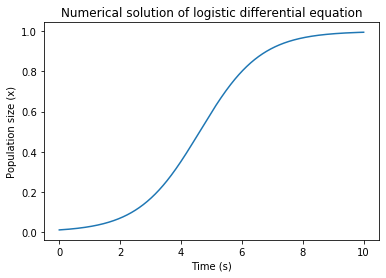

[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
[0.01       0.01009949 0.01019995 ... 0.99543554 0.99548075 0.99552552]


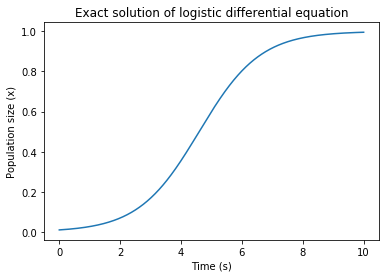

0.9955255179295146
0.9955435104561196
Truncation error: 1.7992526604948544e-05


In [35]:
# Exercise 1, Part (b)
def xPrime(x):
    return (1 - x) * x

a = 0
b = 10
h = 0.01
M = int((b - a) / h)  
s = [a + i * h for i in range(M + 1)]
x = [0.01] * (M + 1)

for i in range(1, M + 1):
    xPrime_i_minus_1 = xPrime(x[i-1])
    x_i = x[i-1] + h * xPrime_i_minus_1
    xPrime_i = xPrime(x_i)
    x[i] = x_i

print("The last value for x is", x[-1])
print("The last value for xPrime is", xPrime(x[-1]))


plt.plot(s, x)
plt.xlabel('Time (s)')
plt.ylabel('Population size (x)')
plt.title('Numerical solution of logistic differential equation')
plt.show()

x0 = .01

def x_exact(x0, s):
    return np.exp(s)/(np.exp(s) + (1.0/x0 - 1))

new_s = np.array(s)
exact_solution = x_exact(x0, new_s)

plt.plot(new_s, exact_solution)
plt.xlabel('Time (s)')
plt.ylabel('Population size (x)')
plt.title('Exact solution of logistic differential equation')
plt.show()


print(exact_solution[-1])
print(x[-1])
truncation_error = abs(exact_solution[-1] - x[-1])
print("Truncation error:", truncation_error)

### Exercise 2
**Note**: If you have not taken PHYS 108, you can simply treat this as an exercise in solving a first-order ODE (Eq. (1)).

In an $RC$-circuit, a capacitor ($C$), a resistor ($R$), and a time-dependent input voltage source ($V(t)$) are connected in series in a single loop, as shown below.

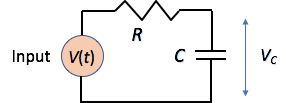

Using Kirchhoff's loop rule, we can write the following differential equation for the charge $q(t)$ on the capacitor: 

$$R\frac{{dq}}{{dt}} + \frac{q}{C} = V\left( t \right). \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)$$

For the following calculations, we will assume the initial condition $q(0)=q_0=0$. 

(a) Re-write Eq. (1) in the standard form: $\frac {{dq}}{{dt}}=...$ (similar to Eq. (3) in Exercise 1, where the derivative of the unknown function is on the left by itself). Assume $V(t)$ is a constant voltage: $V(t)=V_0$ (for $t \ge 0$). Define variables for the following quantities and set them to $R=1 \ \Omega$, $C=1\ \rm{F})$, and $V_0=1 \ \rm{V}$. (The variables allow you to change their values if needed.)  

(b) Solve this initial value problem for $q(t)$ in the time interval $0 \le t \le 10$ using Euler's method with $h=0.01$. (You can re-use your code from Exercise 1 and change the time derivative (`qPrime`) to your new function in Part (a). You should, of course, also change the variable names and make sure that you don't miss any changes that are needed.)

(c) The voltage on the capacitor is given by $V_C(t) = q(t)/C$ (which has the same numerical value as $q(t)$ for $C=1\ \rm{F}$). Plot $V_C(t)$ as a function of time $t$. 

(d) It can be shown that the exact solution to this initial value problem is

$${V_{C,exact}}\left( t \right) = {V_0}\left( {1 - {e^{ - t/(RC)}}} \right). \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ (2)$$

Define a new function using Eq. (2), and add a plot of this exact solution to your plot of numerical solution for comparison. 

### The rest is optional:
(You can revisit this after you take MATH 215 and/or PHYS 207.)

(e) Repeat Parts (a-d) with a different input voltage:

$$V(t) = V_0 sin(\omega t),  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (3)$$

and extend the time range to $0 \le t \le 20$. Again assume all constants are set to 1: $R=1 \ \Omega$, $C=1 \ \rm{F}$, $V_0=1 \ \rm{V}$, and $\omega = 1$ rad/s. Plot the numerical solution $V_C(t) = q(t)/C$ and the input voltage $V(t) = V_0 sin(\omega t)$ on the same graph.

(f) (**Low-pass filter**) If you have taken PHYS 108, you may be familiar with the voltage divider that has two resistors in series with an input voltage source. In this type of voltage divider, the voltage across one of the resistors is a fraction of that of the input voltage source (hence the name "voltage divider"; the value of the fraction is determined by the resistance values of the two resistors). 

It turns out that the $RC$-circuit described here can also work like a voltage divider, but for alternating voltage sources, as we can see in the plot in Part (b) that the amplitude of the voltage across the capacitor is a fraction of that of the input voltage $V(t)$. What's interesting about using the $RC$-circuit as a voltage divider is that the amplitude of the output voltage ($V_C$ here) is frequency-dependent. We can test this by changing the parameter $\omega$ in Part (e) to 2 rad/s and 5 rad/s and observe how the amplitude of $V_C$ decreases. This shows that the output voltage is larger for lower frequencies. A circuit like this is also called a **low-pass filter**. 

(g) (**Steady-state**) The exact solution to the differential equation for the $RC$-circuit here has two parts: **transient** and **steady-state**; the transient term decays exponentially with time, and the steady-state term — also called a **particular solution** — changes with time with the same frequency as the input voltage. It can be shown that the steady-state voltage on the capacitor in this circuit is given by

$${V_{C,p}}\left( t \right) = \frac{{q_p\left( t \right)}}{C} = \frac{{{V_0}}}{{1 + {\omega ^2}{R^2}{C^2}}}\left( {\sin \left( {\omega t} \right) - \omega RC\cos \left( {\omega t} \right)} \right). \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (4)$$

Add a plot of this function to your plot in Part (e) to see if it agrees with your numerical result. Do you see the effect of the transient term? You can change the initial condition $q_0$ to another value (e.g., $q_0=1$) and see what happens.

In the particular solution above, we see the sum of a sine term ($sin(\omega t)$) and a consine term ($cos(\omega t)$). This means that the voltage on the capacitor is **out of phase** with the input voltage, as evident by the horizontal shift between the sinusoidal functions representing $V(t)$ and $V_{C,p}(T)$ in the plot. This is called a **phase shift**, and the amount of phase shift is determined by $R$, $C$, and $\omega $. You can change the values of $R$, $C$, and $\omega $ to see how the phase shift changes. 

The last value for x is 0.9999568287525894
The last value for xPrime is 4.317124741060052e-05


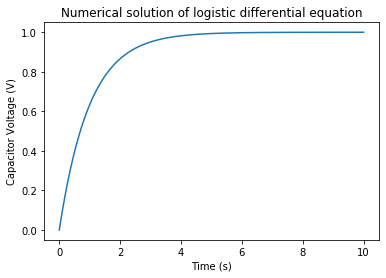

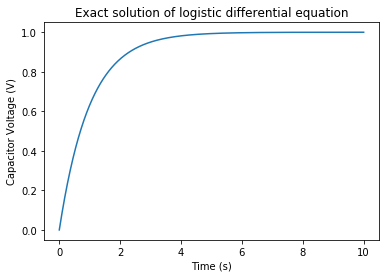

In [30]:
# Exercise 2, parts (a-d)
q_0 = 0
R = 1
C = 1
V_0 = 1
def qPrime(q):
    return (V_0-(q/C))/R


a = 0
b = 10
h = 0.01
M = int((b - a) / h)  
t = [a + i * h for i in range(M + 1)]
q = [q_0] * (M + 1)

for i in range(1, M + 1):
    qPrime_i_minus_1 = qPrime(q[i-1])
    q_i = q[i-1] + h * qPrime_i_minus_1
    qPrime_i = qPrime(q_i)
    q[i] = q_i

print("The last value for x is", q[-1])
print("The last value for xPrime is", qPrime(q[-1]))

V_C = q
plt.plot(t, V_C)
plt.xlabel('Time (s)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('Numerical solution of logistic differential equation')
plt.show()

def V_exact(V_0,t,R,C):
    return V_0*(1-np.exp(-1*t/(R*C)))

t = np.array(t)
exact_solution = V_exact(V_0, t, R, C)

plt.plot(t, exact_solution)
plt.xlabel('Time (s)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('Exact solution of logistic differential equation')
plt.show()

In [5]:
# Exercise 2, parts (e-g)
